In [2]:
import pandas as pd
import numpy as np
import pickle
import time
from matplotlib import pyplot as plt
from operator import add

In [22]:
first_names = pd.read_csv("../../data/processed/crop wild relatives.tsv", sep="\t")

FileNotFoundError: [Errno 2] No such file or directory: '../../data/processed/crop wild relatives.tsv'

In [42]:
first_names = pd.read_csv("../../data/processed/gender_per_author.tsv", sep="\t")

In [45]:
first_names[first_names["publication_year"]==1973]

,Unnamed: 0,author_id,author_display_name,publication_year,firstName,gender
2184,2184,https://openalex.org/A5087541663,E.C. Bate-Smith,1973,E.C.,inconclusive
5381,5381,https://openalex.org/A5035301492,J. S. Faulkner,1973,J.,inconclusive
5997,5997,https://openalex.org/A5007287380,B.E.E. de Wilde-Duyfjes,1973,B.E.E.,inconclusive
9799,9799,https://openalex.org/A5008569219,W. D. Margadant,1973,W.,male
12280,12280,https://openalex.org/A5021278535,P. F. Yeo,1973,P.,inconclusive
13724,13724,https://openalex.org/A5031008265,J. C. Green,1973,J.,inconclusive
13870,13870,https://openalex.org/A5008326087,A. D. Boney,1973,A.,inconclusive
14954,14954,https://openalex.org/A5012294871,Richard Alderson,1973,Richard,male
14977,14977,https://openalex.org/A5091621405,K.M. Old,1973,K.M.,inconclusive
16429,16429,https://openalex.org/A5078190438,Lord Medway,1973,Lord,inconclusive


In [46]:
 import re

In [63]:
for i, row in first_names.iterrows():
    if re.search("^[A-Z]\.", row["firstName"]):
        first_names.loc[i, "gender"] = "initials"

In [70]:
first_names[first_names["publication_year"]==2020].value_counts(subset="gender")

gender
male            1600
female           964
inconclusive     773
initials          97
dtype: int64

In [65]:
first_names.to_csv("../../data/processed/gender_per_author.tsv", sep="\t")

In [ ]:

def plot_gender_balance(first_names, title, filename, start_year=1953):
    male = []
    female = []
    inconclusive = []

    for year in range(start_year,2023):
        counts = first_names[first_names["publication_year"]==year]["gender"].value_counts()

        male.append(counts["male"])
        female.append(counts["female"])
        inconclusive.append(counts["inconclusive"])

    fig, ax = plt.subplots()
    
    plt.title(title)
    ax.bar(range(start_year,2023), male, label="male", color="blue")
    ax.bar(range(start_year,2023), female, label="female", color="red", bottom=male)
    ax.bar(range(start_year,2023), inconclusive, label="inconclusive", color="grey", 
           bottom=list(map(add, male, female)))
    ax.legend()

    plt.savefig(filename)

    
plot_gender_balance(first_names,
                    "Gender balance of taxonomists",
                    "../../reports/figures/gender_balance.png",
                    start_year=2013)


def plot_gender_balance_percentage(first_names, title, filename, start_year=1973):
    male = []
    female = []
    inconclusive = []

    for year in range(start_year,2023):
        counts = first_names[first_names["publication_year"]==year]["gender"].value_counts()
        male.append(counts["male"])
        female.append(counts["female"])
        inconclusive.append(counts["inconclusive"])
    
    total = list(map(add, male, female)) # in two steps because map can only add two lists at a time
    total = list(map(add, total, inconclusive))
    
    male_perc = np.divide(male, total)
    female_perc = np.divide(female, total)
    inc_perc = np.divide(inconclusive, total)
    
    fig, ax = plt.subplots()

    plt.title(title)
    ax.bar(range(start_year,2023), female_perc, label="feminine", color="blue")
    ax.bar(range(start_year,2023), male_perc, label="masculine", color="red", bottom=female_perc)
    ax.bar(range(start_year,2023), inc_perc, label="inconclusive", color="grey", bottom=female_perc+male_perc)
    ax.legend()

    plt.savefig(filename)

plot_gender_balance_percentage(first_names, 
                               "Gender balance of taxonomists",
                               "../../reports/figures/gender_percentages.png")


In [9]:
authors = pd.read_pickle("../../data/interim/eu_filtered_articles_50_years.pkl")
authors

,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,...,source_is_in_doaj,source_host_organization,source_host_organization_name,source_host_organization_lineage,source_host_organization_lineage_names,source_type,oa_is_oa,oa_oa_status,oa_oa_url,oa_any_repository_has_fulltext
0,https://openalex.org/W2112757949,https://doi.org/10.11646/zootaxa.3619.3.2,&lt;strong&gt;&lt;em&gt;Anopheles coluzzii&lt;...,&lt;strong&gt;&lt;em&gt;Anopheles coluzzii&lt;...,2013,2013-02-28,{'openalex': 'https://openalex.org/W2112757949...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,...,False,https://openalex.org/P4310321855,Q15088586,[https://openalex.org/P4310321855],[Q15088586],journal,False,closed,None,False
1,https://openalex.org/W2186535495,https://doi.org/10.11646/zootaxa.1564.1.1,Annotated checklist of the rotifers (Phylum Ro...,Annotated checklist of the rotifers (Phylum Ro...,2007,2007-08-31,{'openalex': 'https://openalex.org/W2186535495...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,...,False,https://openalex.org/P4310321855,Q15088586,[https://openalex.org/P4310321855],[Q15088586],journal,False,closed,None,False
2,https://openalex.org/W2607259890,https://doi.org/10.11646/zootaxa.4251.1.1,The use of bioacoustics in anuran taxonomy: th...,The use of bioacoustics in anuran taxonomy: th...,2017,2017-04-11,{'openalex': 'https://openalex.org/W2607259890...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,False,https://openalex.org/P4310321855,Q15088586,[https://openalex.org/P4310321855],[Q15088586],journal,True,green,https://doi.org/10.11646/zootaxa.4251.1.1,True
3,https://openalex.org/W2287691239,https://doi.org/10.11646/zootaxa.1430.1.1,Systematics of the Palaearctic and Oriental li...,Systematics of the Palaearctic and Oriental li...,2007,2007-03-22,{'openalex': 'https://openalex.org/W2287691239...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,...,False,https://openalex.org/P4310321855,Q15088586,[https://openalex.org/P4310321855],[Q15088586],journal,False,closed,None,False
4,https://openalex.org/W2922603812,https://doi.org/10.11646/zootaxa.3148.1.41,"Order Lepidoptera Linnaeus, 1758. In: Zhang, Z...","Order Lepidoptera Linnaeus, 1758. In: Zhang, Z...",2011,2011-12-23,{'openalex': 'https://openalex.org/W2922603812...,None,"{'is_oa': False, 'landing_page_url': 'https://...",article,...,False,https://openalex.org/P4310321855,Q15088586,[https://openalex.org/P4310321855],[Q15088586],journal,False,closed,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34024,https://openalex.org/W2135504479,https://doi.org/10.1093/molbev/msu205,Blame It on the Chimps: Researchers Resolve Ev...,Blame It on the Chimps: Researchers Resolve Ev...,2014,2014-07-18,{'openalex': 'https://openalex.org/W2135504479...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,False,https://openalex.org/P4310311648,Oxford University Press,"[https://openalex.org/P4310311647, https://ope...","[University of Oxford, Oxford University Press]",journal,True,bronze,https://academic.oup.com/mbe/article-pdf/31/9/...,False
34025,https://openalex.org/W2178346581,https://doi.org/10.1093/molbev/msv238,Unraveling the Genetic Basis of Seahorse Male ...,Unraveling the Genetic Basis of Seahorse Male ...,2015,2015-11-17,{'openalex': 'https://openalex.org/W2178346581...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,False,https://openalex.org/P4310311648,Oxford University Press,"[https://openalex.org/P4310311647, https://ope...","[University of Oxford, Oxford University Press]",journal,True,bronze,https://academic.oup.com/mbe/article-pdf/32/12...,False
34026,https://openalex.org/W2311617183,https://doi.org/10.1093/molbev/msw029,First Genome-Wide Mutational Map of Macaques a...,First Genome-Wide Mutational Map of Macaques a...,2016,2016-03-21,{'openalex': 'https://openalex.org/W2311617183...,en,"{'is_oa': Tr

In [10]:
authors.columns

Index(['id', 'doi', 'title', 'display_name', 'publication_year',
       'publication_date', 'ids', 'language', 'primary_location', 'type',
       'type_crossref', 'open_access', 'authorships',
       'countries_distinct_count', 'institutions_distinct_count',
       'corresponding_author_ids', 'corresponding_institution_ids', 'apc_list',
       'apc_paid', 'cited_by_count', 'biblio', 'is_retracted', 'is_paratext',
       'concepts', 'mesh', 'locations_count', 'locations', 'best_oa_location',
       'sustainable_development_goals', 'grants', 'referenced_works_count',
       'referenced_works', 'related_works', 'ngrams_url',
       'abstract_inverted_index', 'cited_by_api_url', 'counts_by_year',
       'updated_date', 'created_date', 'is_authors_truncated',
       'location_is_oa', 'location_landing_page_url', 'location_pdf_url',
       'location_source', 'location_license', 'location_version',
       'location_is_accepted', 'location_is_published', 'source_id',
       'source_display_nam

In [1]:
import pandas as pd

In [4]:
authors = pd.read_pickle("../../data/processed/european_authors_disambiguated_with_taxonomy.pkl")

In [5]:
authors

,author_id,author_display_name,author_orcid,inst_id,inst_display_name,species_subject,truncatedName,strippedName,order,genera_subjects,families_subjects,orders_subjects,classes_subjects,phyla_subjects,kingdoms_subjects,lineages_subjects
0,https://openalex.org/A5069318718,Martin Kopecký,https://orcid.org/0000-0002-1018-9316,https://openalex.org/I4210132792,Institute of Botany,[],M Kopecký,MartinKopecký,[],{},{},{},{},{},{},[]
1,https://openalex.org/A5033615739,G. Giannatos,None,https://openalex.org/I200777214,National and Kapodistrian University of Athens,[Canis aureus],G Giannatos,GGiannatos,[Carnivora],{Canis},{Canidae},{Carnivora},{Mammalia},{Chordata},{Animalia},"[[Animalia, Chordata, Mammalia, Carnivora, Can..."
2,https://openalex.org/A5076640513,Elena Evguenieva-Hackenberg,https://orcid.org/0000-0001-7270-3168,https://openalex.org/I200763008,University of Giessen,[],E Evguenieva-Hackenberg,ElenaEvguenievaHackenberg,[],{},{},{},{},{},{},[]
3,https://openalex.org/A5063119014,Maxime Rome,https://orcid.org/0000-0002-2937-735X,https://openalex.org/I899635006,Grenoble Alpes University,"[Passiflora kikiana, Passiflora pachyantha, Pa...",M Rome,MaximeRome,[Malpighiales],{Passiflora},{Passifloraceae},{Malpighiales},{Magnoliopsida},{Tracheophyta},{Plantae},"[[Plantae, Tracheophyta, Magnoliopsida, Malpig..."
4,https://openalex.org/A5027649265,Jan Traas,https://orcid.org/0000-0001-5107-1472,https://openalex.org/I4210143888,Laboratoire de Reproduction et Développement d...,[],J Traas,JanTraas,[],{},{},{},{},{},{},[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46909,{https://openalex.org/A5054234383},Christoph Schuster,https://orcid.org/0000-0002-1948-2367,https://openalex.org/I2800011936,Sainsbury Laboratory,Arabidopsis thaliana,C Schuster,ChristophSchuster,Brassicales,{},{},{},{},{},{},[]
46910,{https://openalex.org/A5017324331},Christina Schuster,https://orcid.org/0000-0003-0784-6765,https://openalex.org/I4210165358,Hochschule Geisenheim University,{},C Schuster,ChristinaSchuster,{},{},{},{},{},{},{},[]
46911,{https://openalex.org/A5045393131},Julie Klein,{},https://openalex.org/I28407311,University of Manchester,{},J Klein,JulieKlein,{},{},{},{},{},{},{},[]
46912,{https://openalex.org/A5067198392},Johannes Klein,https://orcid.org/0000-0003-2736-8094,https://openalex.org/I197323543,Johannes Gutenberg University of Mainz,{},J Klein,JohannesKlein,{},{},{},{},{},{},{},[]


In [ ]:
order_counts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # version 3.5.2
import fiona
import geopandas as gpd
import pickle
from itertools import groupby

PROJ: proj_create_from_database: Cannot find proj.db


In [2]:
eu_articles = pd.read_pickle("../../data/processed/european_taxonomic_articles_with_subjects.pkl")

In [3]:
eu_articles.authorships[0]

[{'author_position': 'first',
  'author': {'id': 'https://openalex.org/A5091024907',
   'display_name': 'Caspar A. Hallmann',
   'orcid': 'https://orcid.org/0000-0002-4630-0522'},
  'institutions': [{'id': 'https://openalex.org/I145872427',
    'display_name': 'Radboud University Nijmegen',
    'ror': 'https://ror.org/016xsfp80',
    'country_code': 'NL',
    'type': 'education',
    'lineage': ['https://openalex.org/I145872427']}],
  'countries': ['NL'],
  'is_corresponding': False,
  'raw_author_name': 'Caspar A. Hallmann',
  'raw_affiliation_string': 'Radboud University, Institute for Water and Wetland Research, Animal Ecology and Physiology & Experimental Plant Ecology, PO Box 9100, 6500 GL Nijmegen, The Netherlands.',
  'raw_affiliation_strings': ['Radboud University, Institute for Water and Wetland Research, Animal Ecology and Physiology & Experimental Plant Ecology, PO Box 9100, 6500 GL Nijmegen, The Netherlands.']},
 {'author_position': 'middle',
  'author': {'id': 'https://ope

In [4]:
for article in eu_articles.itertuples():
    countries = []
    for author in article.authorships:
        for institution in author["institutions"]:
            countries.append(institution["country_code"])
            
    if "BG" in countries:
        print(set(countries))

{'DE', 'CA', 'BG'}
{'GB', 'CH', 'FR', 'JP', 'MX', 'LB', 'IT', 'BE', 'PT', 'IQ', 'BG', 'CO', 'CN', 'ES', 'RO', 'BR', 'NG', 'DE', 'IL', 'NL', 'US'}
{'BG', 'RS', 'GR', 'CZ'}
{'HR', 'BG'}
{'BG', 'AT'}
{'RO', 'PL', 'BG'}
{'BG', 'RS', 'AT'}
{'DE', 'BG'}
{'DE', 'CN', 'BG', 'US'}
{'BR', 'AR', 'BG', 'RU', 'DE', 'PT', 'AT', 'US', 'GB', 'CH', 'CN', 'CZ', 'AM', 'ZA', 'ES'}
{'BR', 'AR', 'BG', 'CL', 'MX', 'RU', 'SK', 'AT', 'US', 'UA', 'CN', 'CZ', 'IN', 'ES'}
{'TR', 'BG'}
{'PL', 'BG', 'JP', 'DE', 'GB'}
{'VE', 'FR', 'JP', 'BG', 'MY', 'ZA'}
{'RU', 'UA', 'BG', 'DE'}
{'HU', 'BG'}
{'TR', 'BG'}
{'HU', 'BG'}
{'BG', 'ES', 'MX'}
{'HU', 'BG'}
{'MK', 'BG'}
{'TR', 'BG'}
{'TR', 'BG'}
{'RU', 'DK', 'BG', 'GR'}
{'TR', 'BG'}
{'DE', 'BG', 'IR'}
{'DE', 'BG'}
{'DE', 'BG'}
{'RU', 'HU', 'BG'}
{'RU', 'RO', 'BG'}
{'IT', 'BG'}
{'BG', 'CZ'}
{'BG', 'CZ'}
{'HU', 'BG'}
{'IT', 'BG'}
{'HU', 'BG', 'IR'}
{'MK', 'BG'}
{'PL', 'BG'}
{'BG', 'CZ'}
{'CH', 'BG'}
{'TR', 'BG', 'RS'}
{'DE', 'PL', 'BG'}
{'BR', 'GB', 'BG'}
{'NL', 'BG'}
{'TN', '

In [5]:
articles = pd.read_pickle("../../data/interim/filtered_articles.pkl")

In [6]:
import prep_articles

ModuleNotFoundError: No module named 'prep_articles'

In [7]:
set(eu_authors["inst_country_code"])

NameError: name 'eu_authors' is not defined

In [8]:
def freq_countries(df):
    # get list of countries with authors
    countries = list(df["inst_country_code"])
    # remove None values + alphabetical
    countries = sorted([i for i in countries if i is not None])
    
    # count how many of each group (country)
    freqs = [len(list(group)) for key, group in groupby(countries)]
    
    # link counts to country codes
    freqs_dict = {}
    for i, country in enumerate(sorted(set(countries))):
        freqs_dict[country] = freqs[i]

    return freqs_dict

In [9]:
country_codes = pd.read_csv("../../data/external/country_codes.tsv", sep="\t")
country_codes

,Country,Alpha-2 code,Alpha-3 code
0,Afghanistan,AF,AFG
1,Albania,AL,ALB
2,Algeria,DZ,DZA
3,American Samoa,AS,ASM
4,Andorra,AD,AND
...,...,...,...
242,Western Sahara,EH,ESH
243,Yemen,YE,YEM
244,Zambia,ZM,ZMB
245,Zimbabwe,ZW,ZWE


In [10]:
pop = pd.read_csv("../../data/external/population_counts.csv", skiprows=4)
pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,NaN


In [11]:
countries = pd.merge(country_codes, pop[["Alpha-3 code", "2022"]], how="left", on="Alpha-3 code")

KeyError: "['Alpha-3 code'] not in index"

In [12]:
countries.columns = ["Country", "Alpha-2 code", "Alpha-3 code", "Population"]
countries

AttributeError: 'list' object has no attribute 'columns'

In [13]:
countries.to_csv("../../data/external/country_codes_and_population.tsv", sep="\t")

AttributeError: 'list' object has no attribute 'to_csv'

In [14]:
pop = pop.rename(columns = {"Country Code":"Alpha-3 code"})

In [15]:
pop

,Country Name,Alpha-3 code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,NaN


In [17]:
# get worldmap 
def plot_country_freqs(freqs, map_path, europe=False, dpi='figure', relative=False):
    worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    worldmap = worldmap.to_crs("ESRI:54009") # Mollweide projection

    # convert 3-letter codes to 2-letter codes used for frequencies
    country_codes = pd.read_csv("../../data/external/country_codes.tsv", sep="\t")
    
    worldmap = worldmap.rename(columns={"iso_a3":"Alpha-3 code"})
    # fixing country codes in worldmap
    worldmap.at[43,"Alpha-3 code"] = "FRA"
    worldmap.at[21,"Alpha-3 code"] = "NOR"
    worldmap.at[174,"Alpha-3 code"] = "XKX"
    
    worldmap = pd.merge(worldmap, country_codes[["Alpha-2 code", "Alpha-3 code"]], 
                        on="Alpha-3 code", how="left")

    # add frequencies to worldmap
    worldmap["freq"] = worldmap["Alpha-2 code"].map(freqs)
    worldmap["freq"].fillna(0, inplace=True)
    worldmap.replace(0, np.nan, inplace=True)
    
    if relative:
        worldmap = worldmap.rename(columns={"freq":"absolute_freq"})
        # map percentage of country's population that are taxonomists
        worldmap["freq"] = worldmap["absolute_freq"]/worldmap["pop_est"]*100
            
    # plot frequencies
    if not europe:
        fig, ax = plt.subplots(1,1)
        worldmap.plot(column='freq', cmap="viridis", ax=ax, legend=True,
                      missing_kwds={"color":"lightgrey"})
    
    if europe:
        fig, ax = plt.subplots(1, 1)
        # limit scope of map to europe
        minx, miny, maxx, maxy = [-1500000, 4000000, 4300000, 8500000]
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)
        
        plt.xticks([])
        plt.yticks([])
        
        worldmap.plot(column='freq', ax=ax, legend=True, cmap="viridis",
                      missing_kwds={"color":"lightgrey"})

In [27]:
eu_authors.columns

Index(['Index', 'article_id', 'author_position', 'author', 'institutions',
       'countries', 'is_corresponding', 'raw_author_name',
       'raw_affiliation_string', 'raw_affiliation_strings', 'author_id',
       'author_display_name', 'author_orcid', 'inst_id', 'inst_display_name',
       'inst_ror', 'inst_country_code', 'inst_type', 'inst_lineage',
       'countries_list', 'id', 'doi', 'title', 'display_name',
       'publication_year', 'publication_date', 'ids', 'language',
       'primary_location', 'type', 'type_crossref', 'open_access',
       'authorships', 'countries_distinct_count',
       'institutions_distinct_count', 'corresponding_author_ids',
       'corresponding_institution_ids', 'apc_list', 'apc_paid',
       'cited_by_count', 'biblio', 'is_retracted', 'is_paratext', 'concepts',
       'mesh', 'locations_count', 'locations', 'best_oa_location',
       'sustainable_development_goals', 'grants', 'referenced_works_count',
       'referenced_works', 'related_works', 'ngra

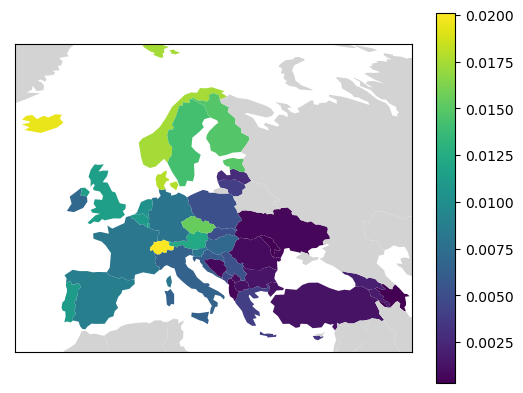

In [25]:
plot_country_freqs(countries_freq, "../../reports/figures/map_european_authors", europe=True,
                   relative=True) # source population estimate?

In [21]:
eu_authors = pd.read_pickle("../../data/interim/european_taxonomic_authors_no_duplicates.pkl")

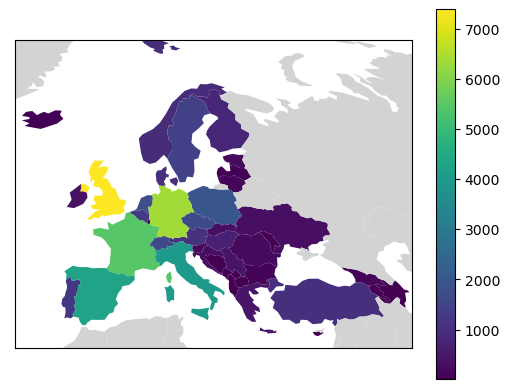

In [22]:
countries_freq = freq_countries(eu_authors)
plot_country_freqs(countries_freq, "../../reports/figures/map_european_authors", europe=True)

Authors' institutions plotted onto world maps. Results in reports/figures.


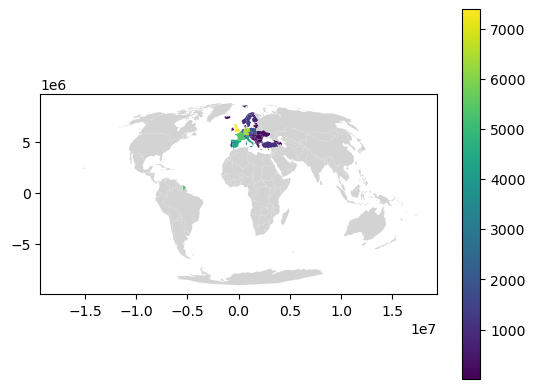

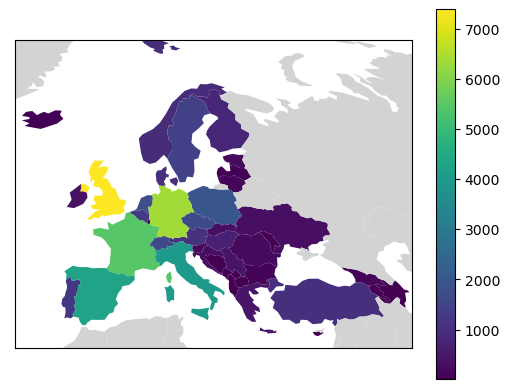

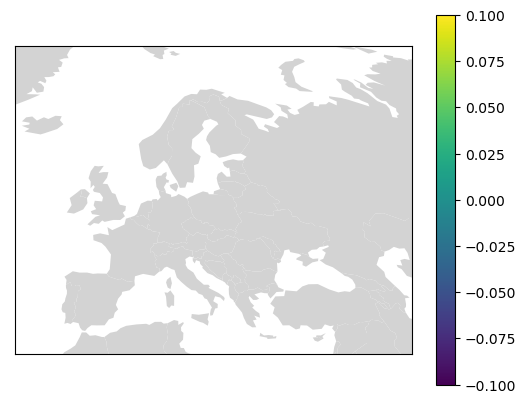

In [24]:
countries_freq = freq_countries(eu_authors)
plot_country_freqs(countries_freq, "../../reports/figures/map_authors_of_european_articles")

countries_freq = freq_countries(eu_authors)
plot_country_freqs(countries_freq, "../../reports/figures/map_european_authors", europe=True)

eujot_freq = freq_countries(eu_authors[eu_authors["inst_display_name"]=="European journal of taxonomy"])
plot_country_freqs(eujot_freq, "../../reports/figures/map_eujot", europe=True)

print("Authors' institutions plotted onto world maps. Results in reports/figures.")


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

In [2]:
articles = pd.read_pickle("../../data/processed/european_taxonomic_articles_with_subjects.pkl")
articles

,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,...,source_host_organization_name,source_host_organization_lineage,source_host_organization_lineage_names,source_type,is_oa,oa_status,oa_url,any_repository_has_fulltext,abstract_full_text,species_subject
0,https://openalex.org/W2766208183,https://doi.org/10.1371/journal.pone.0185809,More than 75 percent decline over 27 years in ...,More than 75 percent decline over 27 years in ...,2017,2017-10-18,{'openalex': 'https://openalex.org/W2766208183...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,Public Library of Science,[https://openalex.org/P4310315706],[Public Library of Science],journal,True,gold,https://doi.org/10.1371/journal.pone.0185809,True,Global declines in insects have sparked wide i...,[]
1,https://openalex.org/W1577451703,https://doi.org/10.1371/journal.pone.0131080,Biodiversity on the Rocks: Macrofauna Inhabiti...,Biodiversity on the Rocks: Macrofauna Inhabiti...,2015,2015-07-09,{'openalex': 'https://openalex.org/W1577451703...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,Public Library of Science,[https://openalex.org/P4310315706],[Public Library of Science],journal,True,gold,https://journals.plos.org/plosone/article/file...,True,Carbonate communities: The activity of anaerob...,[]
2,https://openalex.org/W2054385769,https://doi.org/10.1371/journal.pone.0057923,The Variability of the 16S rRNA Gene in Bacter...,The Variability of the 16S rRNA Gene in Bacter...,2013,2013-02-27,{'openalex': 'https://openalex.org/W2054385769...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,Public Library of Science,[https://openalex.org/P4310315706],[Public Library of Science],journal,True,gold,https://journals.plos.org/plosone/article/file...,True,16S ribosomal RNA currently represents the mos...,[]
3,https://openalex.org/W2130560194,https://doi.org/10.1371/journal.pone.0105992,SoilGrids1km — Global Soil Information Based o...,SoilGrids1km — Global Soil Information Based o...,2014,2014-08-29,{'openalex': 'https://openalex.org/W2130560194...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,Public Library of Science,[https://openalex.org/P4310315706],[Public Library of Science],journal,True,gold,https://journals.plos.org/plosone/article/file...,True,Background Soils are widely recognized as a no...,[]
4,https://openalex.org/W2113487278,https://doi.org/10.1371/journal.pone.0065427,Identifying the World's Most Climate Change Vu...,Identifying the World's Most Climate Change Vu...,2013,2013-06-12,{'openalex': 'https://openalex.org/W2113487278...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,Public Library of Science,[https://openalex.org/P4310315706],[Public Library of Science],journal,True,gold,https://journals.plos.org/plosone/article/file...,True,Climate change will have far-reaching impacts ...,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31070,https://openalex.org/W4287448631,https://doi.org/10.1016/j.cub.2022.06.008,Microbial ecology: Metabolic heterogeneity and...,Microbial ecology: Metabolic heterogeneity and...,2022,2022-07-01,{'openalex': 'https://openalex.org/W4287448631...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,...,Elsevier BV,[https://openalex.org/P4310320990],[Elsevier BV],journal,False,closed,None,False,Many bacterial species are capable of differen...,[]
31071,https://openalex.org/W4292634268,https://doi.org/10.1016/j.cub.2022.07.042,Colin Blakemore (1944–2022),Colin Blakemore (1944–2022),2022,2022-08-01,{'openalex': 'https://openalex.org/W4292634268...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,Elsevier BV,[https://openalex.org/P4310320990],[Elsevier BV],journal,True,bronze,https://doi.org/10.1016/j.cub.2022.07.042,False,Professor Sir Colin Blakemore FRS died after 1...,[]
31072,https://openalex.org/W4297143354,https://doi.org/10.1016/j.

In [34]:
## GBIF TAXONOMIC BACKBONE
backbone = pd.read_csv("../../data/external/backbone/Taxon.tsv", sep="\t", on_bad_lines='skip')

C:\Users\melanie\AppData\Local\Temp\ipykernel_22476\460668360.py:2: DtypeWarning: Columns (9,10,16,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  backbone = pd.read_csv("../../data/external/backbone/Taxon.tsv", sep="\t", on_bad_lines='skip')


In [35]:
# reduce size of backbone for easier searching
backbone = backbone[backbone["taxonomicStatus"]!="doubtful"]
backbone = backbone[["canonicalName", "family"]]
# remove taxa with no known species name or family
backbone = backbone.dropna().drop_duplicates(ignore_index=True).reset_index(drop=True)

In [36]:
## LINK ARTICLES TO BACKBONE
# start with empty list for every taxonomic level 
articles["families"] = [list() for _ in range(len(articles.index))]

In [40]:
seen_species = {}

for species in backbone.itertuples():
    if species.canonicalName not in seen_species:
        seen_species[species.canonicalName] = species.family

In [54]:
# for every author, break down every species they study into different taxonomic levels
for i, article in articles.iterrows():
    for species in article["species_subject"]:
        if species in seen_species:
            # get family name according to GBIF
            family_name = seen_species[species]
            # add this family (families) to the list of genera studied by the author (no duplicates)
            if family_name not in article["families"]:
                articles.loc[i, "families"].append(family_name)

In [57]:
family_counts = dict()

for fam_list in articles["families"]:
    for family in fam_list:
        if family in family_counts:
            family_counts[family] += 1
        else:
            family_counts[family] = 0

In [69]:
df= pd.DataFrame({"family":family_counts.keys(), "articles":family_counts.values()})

In [75]:
df.sort_values("articles", ascending=False).head(20)

,family,articles
6,Asteraceae,362
28,Poaceae,285
27,Brassicaceae,285
50,Fabaceae,271
259,Orchidaceae,242
1111,Staphylinidae,214
122,Curculionidae,149
56,Drosophilidae,137
390,Scarabaeidae,127
226,Formicidae,122


PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

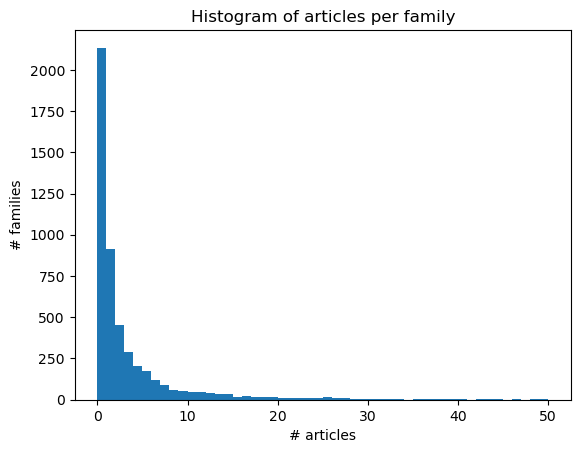

In [82]:
plt.hist(family_counts.values(), bins=50, range=(0,50))
plt.xlabel("# articles")
plt.ylabel("# families")
plt.title("Histogram of articles per family")
plt.savefig("../../reports/figures/cumulative_graph_european_authors_in_journals.pdf", dpi=600)
pages = convert_from_path("../../reports/figures/cumulative_graph_european_authors_in_journals.pdf", 600)
page.save("../../reports/figures/cumulative_graph_european_authors_in_journals.png", 'PNG')
plt.show()

In [ ]:
pdftoppm -png -r 600 filename.pdf filename